In [1]:
# Import packages
import fastbook
fastbook.setup_book()

from fastbook import *
from fastai.vision.widgets import *

/home/CAMPUS/cemb2020/anaconda3/envs/arcslab/lib/python3.8/site-packages/fastbook/__init__.py:18: UserWarning: Missing `graphviz` - please run `conda install fastbook`
  except ModuleNotFoundError: warn("Missing `graphviz` - please run `conda install fastbook`")


In [2]:
# Specify output categories for NN and path to get training/validation images
move_type = 'straight', 'right', 'left'
path = Path("Images-Marchese")

In [3]:
# Getting images from specified path
fns = get_image_files(path)
fns

(#829) [Path('Images-Marchese/left/left_move45.png'),Path('Images-Marchese/left/left_move19.png'),Path('Images-Marchese/left/left_move18.png'),Path('Images-Marchese/left/left_move59.png'),Path('Images-Marchese/left/sc11.png'),Path('Images-Marchese/left/sc40.png'),Path('Images-Marchese/left/sc34.png'),Path('Images-Marchese/left/sc22.png'),Path('Images-Marchese/left/left_move4.png'),Path('Images-Marchese/left/left_move66.png')...]

In [4]:
lefts = (path/'left').ls().sorted()
rights = (path/'right').ls().sorted()
straights = (path/'straight').ls().sorted()
print("Straights: " + str(len(straights)))
print("Lefts: " + str(len(lefts)))
print("Rights: " + str(len(rights)))

Straights: 431
Lefts: 114
Rights: 287


In [5]:
# Verify all images in path
failed = verify_images(fns)
failed

(#0) []

In [6]:
dls = ImageDataLoaders.from_folder(path, valid_pct=0.2, seed=42, item_tfms=Resize(128)) 
dls

In [21]:
"""# Creating DataLoader object for directions
movement = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))"""

'# Creating DataLoader object for directions\nmovement = DataBlock(\n    blocks=(ImageBlock, CategoryBlock), \n    get_items=get_image_files, \n    splitter=RandomSplitter(valid_pct=0.2, seed=42),\n    get_y=parent_label,\n    item_tfms=Resize(128))'

In [22]:
"""# Checking the labeling of the images
dls = movement.dataloaders(path)
dls.valid.show_batch(max_n=10, nrows=2)"""

'# Checking the labeling of the images\ndls = movement.dataloaders(path)\ndls.valid.show_batch(max_n=10, nrows=2)'

In [31]:
# Training the model
learn = cnn_learner(dls, resnet18, loss_func=CrossEntropyLossFlat(), metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.335254,0.619241,0.185930,00:03


epoch,train_loss,valid_loss,error_rate,time
0,0.638222,0.296708,0.092965,00:04
1,0.478931,0.239238,0.087940,00:04
2,0.390457,0.212151,0.070352,00:04
3,0.303942,0.193518,0.067839,00:04


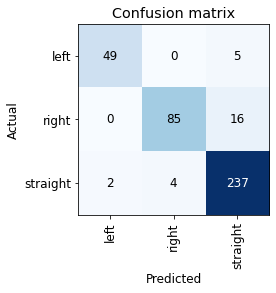

In [32]:
# Seeing where the model may have gotten confused in classification
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

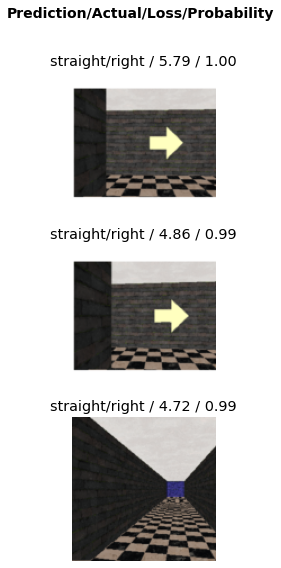

In [25]:
# Looking at the images that most confused the NN
interp.plot_top_losses(3, nrows=3)

In [26]:
# Loading in GUI that helps clean the data set
cleaner = ImageClassifierCleaner(learn)
cleaner

In [28]:
# Delete specified images in cleaner
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
    
# Move specified images in cleaner
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [71]:
# Export model for future use
learn.export(os.path.abspath('Move_NN.pkl'))

In [33]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  